# Zero shot classification

#### Approach:

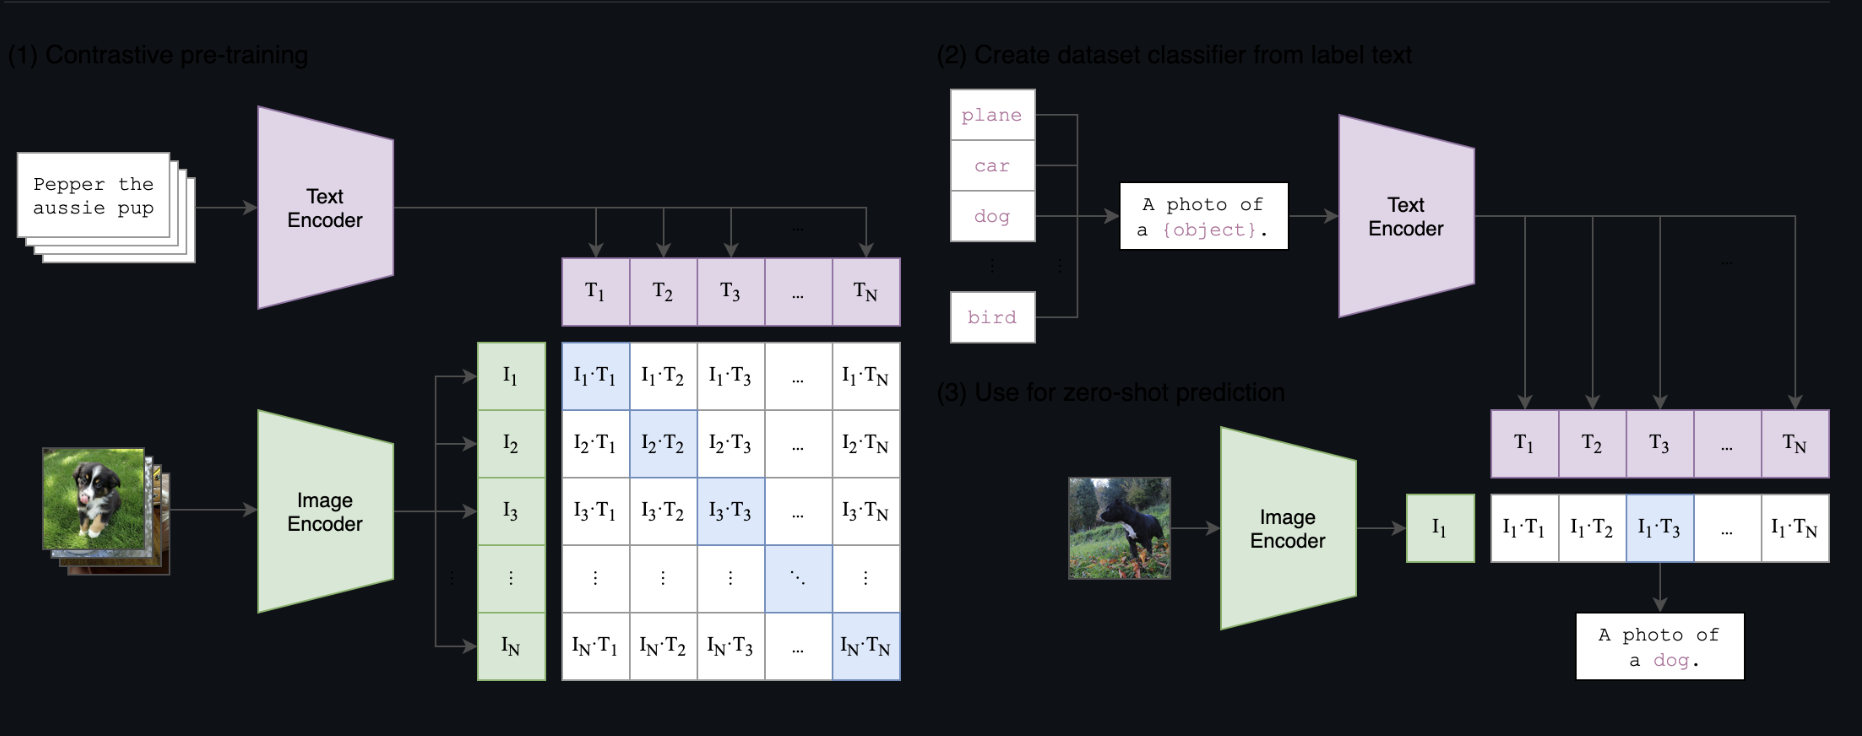


#### Pre - trained model used : OpenAI CLIP-ViT-B32 

#### Objective : To classify pipes and cars

#### Accuracy test on a sample size of 50 : 96%





## Importing the required packages

In [1]:
import torch
import clip
from PIL import Image
import numpy as np
import cv2
import glob, random
import imutils, os, time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def get_random_path():
    file_path = '/Users/jimildigaswala/Downloads/mv/dataset/test'
    first_path = os.listdir(file_path)
    while '.DS_Store' in first_path:
        class_path = random.choice(first_path)
        if class_path != '.DS_Store':
            rfile = os.path.join(file_path, class_path)
            img_list = os.listdir(rfile)
            sel_img = random.choice(img_list)
            rfile= rfile+'/'+ sel_img
            return class_path, rfile

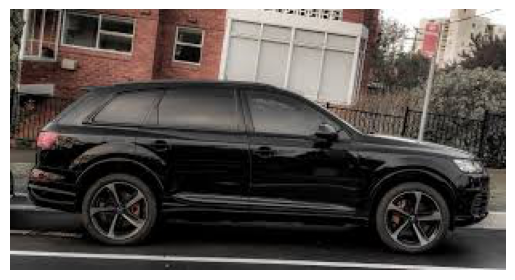

In [9]:
class_path,rfile=get_random_path()

image_display = mpimg.imread(rfile)

# Display the image
plt.imshow(image_display)
plt.axis('off')  # Hide axes
plt.show()

In [4]:
def clip_predict_vit(rfile):
    
    #Checking if CUDA enabled GPU is available and select it
    device = "cuda" if torch.cuda.is_available() else "cpu"
    #Defining the model to be used
    model_use = "ViT-B/32"
    
    #Importing preprocessing functions
    model, preprocess = clip.load(model_use, device=device)
    
    #Preprocessing the images and loading it to device
    image = preprocess(Image.open(rfile)).unsqueeze(0).to(device)
    
    #Specifying the list of classes for classification
    class_list = ['cars', 'pipes']
    start_time = time.time()
    
    # Tokenize the class list to be used as text input for CLIP
    text = clip.tokenize(class_list).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)

        #Get the logits for image and text
        logits_per_image, logits_per_text = model(image, text)
        
        # Convert the logits to probabilities using softmax
        probs = np.array(logits_per_image.softmax(dim=-1).cpu().numpy())

    #Getting the predicted label with the highest probability
    label = np.argmax(probs[0])
    end_time = time.time()
    print("ViT inference time :", end_time-start_time,"seconds")

    #Return the predicted class label and the file p
    return class_list[label], rfile

In [5]:
def count_pipes(image_path):
    predicted_class = clip_predict_vit(image_path)[0]
    return predicted_class.count('pipes')

#### In the CLIP model, textual features are extracted from natural language descriptions associated with images during the training process. CLIP is trained on a large-scale dataset that includes pairs of images and corresponding textual descriptions. These descriptions could be captions, tags, or any other form of natural language annotations.

#### Features from the tokenized text and processed image is fed into the the model to calculate the semantic relationship between them and predict the class based on similarity

In [6]:
if __name__ == "__main__":
    vit_correct = 0
    total_samples = 50

    for i in range(total_samples):
        gt, rfile = get_random_path()

        print('Stage:', i + 1)
        print("Ground Truth:", gt)

        # Make predictions using the clip_predict_vit function
        predict_vit, rfile_vit = clip_predict_vit(rfile)
        print("Predicted Class ViT:", predict_vit)

        if gt == predict_vit:
            vit_correct += 1

    accuracy = vit_correct / total_samples
    print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

Stage: 1
Ground Truth: pipes
ViT inference time : 0.18264412879943848 seconds
Predicted Class ViT: pipes
Stage: 2
Ground Truth: pipes
ViT inference time : 0.1684107780456543 seconds
Predicted Class ViT: pipes
Stage: 3
Ground Truth: pipes
ViT inference time : 0.1886439323425293 seconds
Predicted Class ViT: pipes
Stage: 4
Ground Truth: cars
ViT inference time : 0.18935418128967285 seconds
Predicted Class ViT: cars
Stage: 5
Ground Truth: cars
ViT inference time : 0.1623988151550293 seconds
Predicted Class ViT: cars
Stage: 6
Ground Truth: pipes
ViT inference time : 0.17747092247009277 seconds
Predicted Class ViT: pipes
Stage: 7
Ground Truth: pipes
ViT inference time : 0.21116209030151367 seconds
Predicted Class ViT: pipes
Stage: 8
Ground Truth: pipes
ViT inference time : 0.16984295845031738 seconds
Predicted Class ViT: pipes
Stage: 9
Ground Truth: cars
ViT inference time : 0.18697214126586914 seconds
Predicted Class ViT: cars
Stage: 10
Ground Truth: cars
ViT inference time : 0.210725069046

## Predicting individual image 

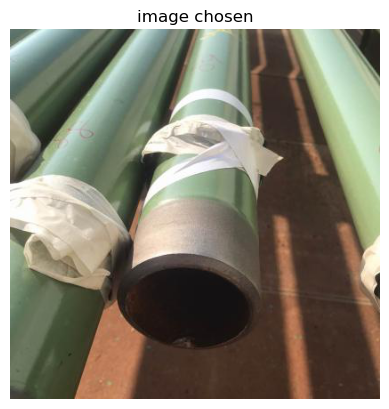


Ground Truth: pipes
ViT inference time : 0.23026609420776367 seconds
Predicted Class ViT: pipes


In [7]:
if __name__ == "__main__":
    vit_correct = 0
    total_samples = 50

    gt, rfile = get_random_path()

    # Display the chosen image
    image_display = mpimg.imread(rfile)
    plt.imshow(image_display)
    plt.title('image chosen')
    plt.axis('off')  # Hide axes
    plt.show()

    print("\nGround Truth:", gt)

    predict_vit, rfile_vit = clip_predict_vit(rfile)
    print("Predicted Class ViT:", predict_vit)

    if gt == predict_vit:
        vit_correct += 1
